In [780]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

import numpy as np

In [781]:
data = pd.read_csv (r'C:\Users\ishay\Downloads\Cricket_player_rating.csv')   
df = pd.DataFrame(data)
print (df)


        ID                  Name   Age  100s  50s     6s  Balls  Balls Faced  \
0        0       Terrence Duffin  36.0   136  3.0    0.0      5          994   
1        1    Keith W R Fletcher  74.0    23  5.0    6.0    240         1134   
2        2  Muttiah Muralitharan  46.0   140  0.0   12.0  18994          869   
3        3           Wasim Akram  52.0   115  6.0  121.0  18343         4210   
4        4          Waqar Younis  47.0    25  0.0   21.0  12816         1445   
...    ...                   ...   ...   ...  ...    ...    ...          ...   
1742  1742           Karim Janat  20.0    32  0.0    0.0    254           33   
1743  1743        Nosaina Pokana  22.0   118  0.0    0.0     63           37   
1744  1744     Lalchand S Rajput  57.0    44  0.0    0.0    130           31   
1745  1745            Rashid Zia  44.0    75  0.0    0.0     25           57   
1746  1746            Asif Iqbal  35.0   133  0.0    0.0     32            8   

      Bat_Average  Bowl_Strike_rate  Ec

In [782]:
df.head()

,ID,Name,Age,100s,50s,6s,Balls,Balls Faced,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Maidens,Overs,Runs,Wickets,Ratings
0,0,Terrence Duffin,36.0,136,3.0,0.0,5,994,23.74,48.979948,5.26476,319.0,1585.0,1,693,77.0,126
1,1,Keith W R Fletcher,74.0,23,5.0,6.0,240,1134,39.84,48.979948,5.26476,31.0,70.0,424,792,165.0,194
2,2,Muttiah Muralitharan,46.0,140,0.0,12.0,18994,869,6.81,35.230000,3.93000,343.0,996.0,3071,751,496.0,697
3,3,Wasim Akram,52.0,115,6.0,121.0,18343,4210,16.52,36.230000,3.90000,113.0,251.0,3280,3593,406.0,790
4,4,Waqar Younis,47.0,25,0.0,21.0,12816,1445,10.31,30.520000,4.69000,149.0,476.0,1815,907,252.0,564


## Correlation statistics

In [783]:
correlation = df.corr()

### Correlation of all variables

In [784]:
correlation

,ID,Age,100s,50s,6s,Balls,Balls Faced,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Maidens,Overs,Runs,Wickets,Ratings
ID,1.000000,0.031279,0.013368,-0.055357,-0.200170,-0.663949,-0.091038,0.082266,0.257942,0.294056,0.032152,0.008050,-0.520084,-0.093525,-0.064188,-0.459838
Age,0.031279,1.000000,-0.009230,0.038421,-0.047625,0.025115,0.058514,0.002509,0.078520,-0.169190,-0.015047,-0.034293,0.041034,0.038787,-0.000930,-0.045945
100s,0.013368,-0.009230,1.000000,0.071112,0.046479,-0.006761,0.072595,0.084305,0.014359,0.028303,0.003121,-0.013867,-0.008164,0.071673,0.020589,0.051339
50s,-0.055357,0.038421,0.071112,1.000000,0.770988,0.183885,0.974160,0.564990,-0.041313,0.064428,0.025564,0.008353,0.171196,0.965957,0.001937,0.637904
6s,-0.200170,-0.047625,0.046479,0.770988,1.000000,0.386135,0.759470,0.451880,-0.033809,0.020297,0.017869,0.024029,0.357850,0.812539,0.032508,0.686031
Balls,-0.663949,0.025115,-0.006761,0.183885,0.386135,1.000000,0.243668,0.018145,-0.115411,-0.163495,-0.025910,-0.006555,0.865156,0.256078,0.102834,0.655175
Balls Faced,-0.091038,0.058514,0.072595,0.974160,0.759470,0.243668,1.000000,0.573402,-0.042450,0.063417,0.028560,0.010713,0.229115,0.976365,0.007699,0.667106
Bat_Average,0.082266,0.002509,0.084305,0.564990,0.451880,0.018145,0.573402,1.000000,0.032879,0.162818,0.053338,0.026683,0.042384,0.552590,-0.026657,0.586431
Bowl_Strike_rate,0.257942,0.078520,0.014359,-0.041313,-0.033809,-0.115411,-0.042450,0.032879,1.000000,0.035870,0.002319,0.047219,-0.087482,-0.033838,-0.002520,-0.239863
Economy_Rate,0.294056,-0.169190,0.028303,0.064428,0.020297,-0.163495,0.063417,0.162818,0.035870,1.000000,0.075016,0.071810,-0.101706,0.057132,-0.017357,-0.019691


### Correlation of all variables with rating

In [785]:
correlation = correlation["Ratings"]

In [786]:
correlation

ID                 -0.459838
Age                -0.045945
100s                0.051339
50s                 0.637904
6s                  0.686031
Balls               0.655175
Balls Faced         0.667106
Bat_Average         0.586431
Bowl_Strike_rate   -0.239863
Economy_Rate       -0.019691
Innings             0.008738
Maidens             0.002186
Overs               0.583716
Runs                0.670315
Wickets             0.052981
Ratings             1.000000
Name: Ratings, dtype: float64

In [787]:
df.rename(columns = {"Balls":"Balls bowled", "Overs":"Overs bowled","Runs":"Runs scored"},inplace =True)

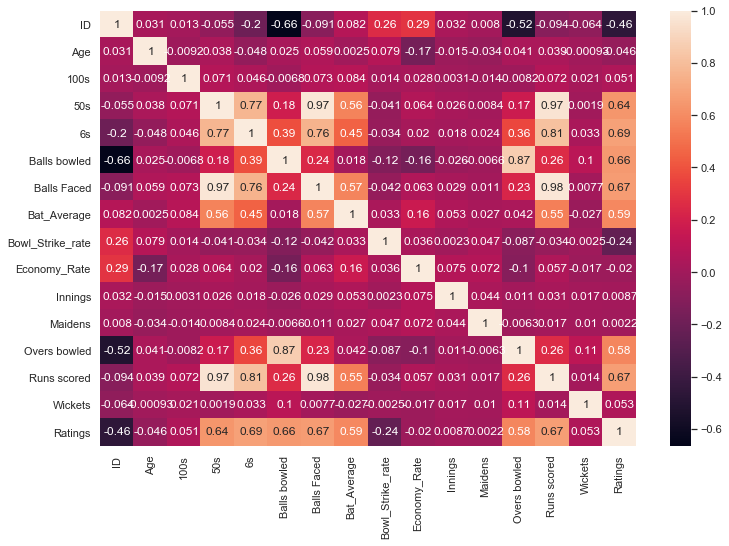

In [788]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot =True )



#### From the correlation matrix, it can be concluded that both bowling and batting factors have an impact on the rating of a player. There are 5 batting factors and 2 bowling factors that have a significant impact on rating. 

#### Batting factors: 50s, 6s, Balls Faced, Bat_Average, Runs
#### Bowling factors: Overs, balls bowled

## Removing insignificant columns

In [789]:
df.drop(['ID', "Age", "100s", "Bowl_Strike_rate", "Economy_Rate", "Innings", "Maidens", "Wickets"], axis = 1, inplace = True)

In [790]:
df.head()

,Name,50s,6s,Balls bowled,Balls Faced,Bat_Average,Overs bowled,Runs scored,Ratings
0,Terrence Duffin,3.0,0.0,5,994,23.74,1,693,126
1,Keith W R Fletcher,5.0,6.0,240,1134,39.84,424,792,194
2,Muttiah Muralitharan,0.0,12.0,18994,869,6.81,3071,751,697
3,Wasim Akram,6.0,121.0,18343,4210,16.52,3280,3593,790
4,Waqar Younis,0.0,21.0,12816,1445,10.31,1815,907,564


## Data statistics

In [791]:
df.describe()


,50s,6s,Balls bowled,Balls Faced,Bat_Average,Overs bowled,Runs scored,Ratings
count,1746.000000,1745.00000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000
mean,4.081329,9.92894,1233.955924,1019.542645,17.043080,268.886663,809.521465,163.334287
std,10.877501,26.29760,2106.467250,2270.967688,11.849021,340.059253,1729.238782,116.980767
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-109.000000
25%,0.000000,0.00000,140.500000,36.000000,9.000000,78.000000,89.000000,89.000000
50%,0.000000,1.00000,416.000000,163.000000,13.970000,172.000000,210.000000,146.000000
75%,2.000000,7.00000,1348.000000,745.000000,24.270000,320.500000,605.500000,215.000000
max,96.000000,351.00000,18994.000000,21367.000000,97.000000,3280.000000,18194.000000,844.000000


In [792]:
df.Ratings.describe()

count    1747.000000
mean      163.334287
std       116.980767
min      -109.000000
25%        89.000000
50%       146.000000
75%       215.000000
max       844.000000
Name: Ratings, dtype: float64

## Removing rows with null values

In [793]:
df.dropna(inplace = True)

In [794]:
df.isnull().sum()

Name            0
50s             0
6s              0
Balls bowled    0
Balls Faced     0
Bat_Average     0
Overs bowled    0
Runs scored     0
Ratings         0
dtype: int64

## Analysis of top 15 players with highest ratings

In [795]:
Highest = df.sort_values(by = "Ratings", ascending = False)

In [796]:
Highest = Highest.head(15)

In [824]:
Highest = Highest.sort_values(by = "Ratings", ascending = True)

### Analysis of Top 15 players by rating

Text(0, 0.5, 'Name')

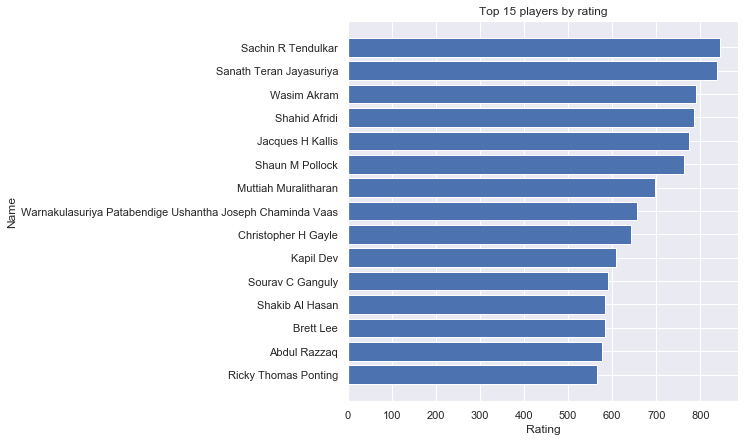

In [830]:
plt.figure(figsize = (7,7), facecolor = 'white')
plt.subplot()
plt.barh(Highest["Name"],Highest["Ratings"])
plt.title('Top 15 players by rating')
plt.xlabel('Rating')
plt.ylabel('Name')

### Top 3 Batting statistics vs rating

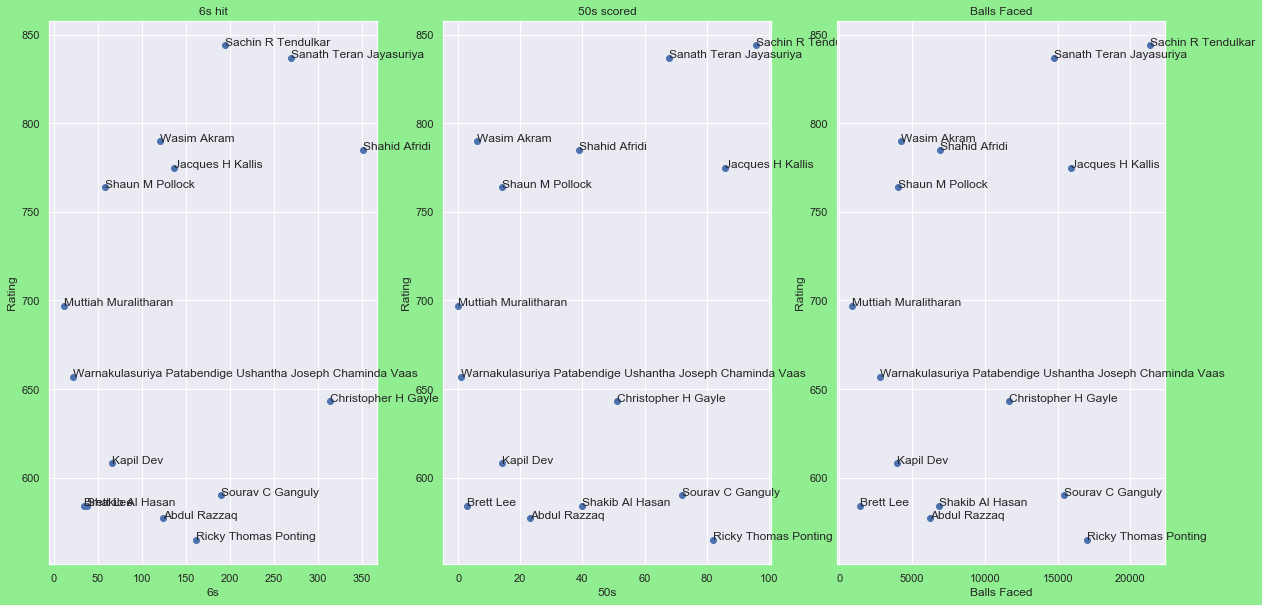

In [799]:
Names = [i for i in Highest["Name"]]
x1 = [i for i in Highest["6s"]]
x2 = [i for i in Highest["50s"]]
x3 = [i for i in Highest["Balls Faced"]]
y = [i for i in Highest["Ratings"]]

plt.figure(figsize = (20,10), facecolor = 'lightgreen')
plt.subplot(1, 3, 1)
plt.scatter(Highest["6s"], Highest["Ratings"])
plt.title('6s hit')
plt.xlabel('6s')
plt.ylabel('Rating')

for i, txt in enumerate(Names):
    plt.annotate(txt, (x1[i], y[i]))



plt.subplot(1, 3, 2)
plt.scatter(Highest["50s"], Highest["Ratings"])
plt.title('50s scored')
plt.xlabel('50s')
plt.ylabel('Rating')

for i, txt in enumerate(Names):
    plt.annotate(txt, (x2[i], y[i]))


plt.subplot(1, 3, 3)
plt.scatter(Highest["Balls Faced"], Highest["Ratings"])
plt.title('Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Rating')

for i, txt in enumerate(Names):
    plt.annotate(txt, (x3[i], y[i]))




### Top 2 Bowling statistics vs rating

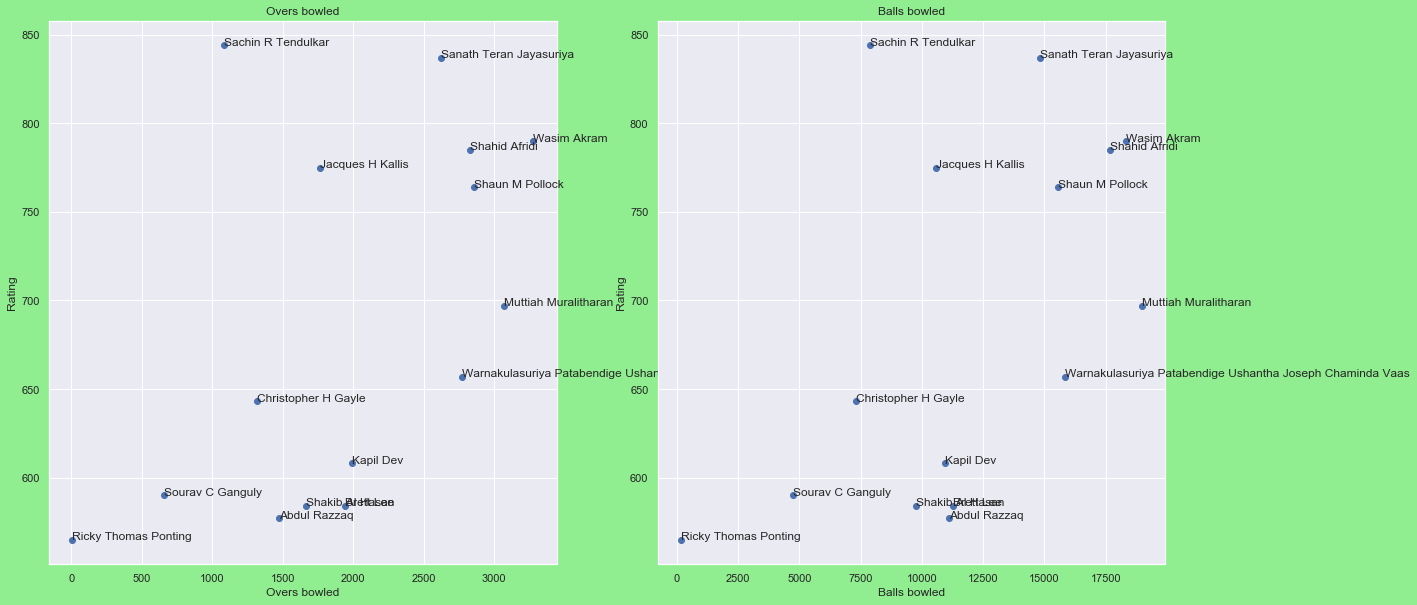

In [800]:
Names = [i for i in Highest["Name"]]
x1 = [i for i in Highest["Overs bowled"]]
x2 = [i for i in Highest["Balls bowled"]]
y = [i for i in Highest["Ratings"]]

plt.figure(figsize = (20,10), facecolor = 'lightgreen')
plt.subplot(1, 2, 1)
plt.scatter(Highest["Overs bowled"], Highest["Ratings"])
plt.title('Overs bowled')
plt.xlabel('Overs bowled')
plt.ylabel('Rating')

for i, txt in enumerate(Names):
    plt.annotate(txt, (x1[i], y[i]))


plt.subplot(1, 2, 2)
plt.scatter(Highest["Balls bowled"], Highest["Ratings"])
plt.title('Balls bowled')
plt.xlabel('Balls bowled')
plt.ylabel('Rating')

for i, txt in enumerate(Names):
    plt.annotate(txt, (x2[i], y[i]))

#### For the top 15 players, the plots show that the players with the highest rating generally have very good bowling and batting figures
#### Despite there being more batting variables that affect rating, the bowling variables individually show a better correlation with the rating of a player, for the for the top 15

## Distribution of significant variables

### Rating

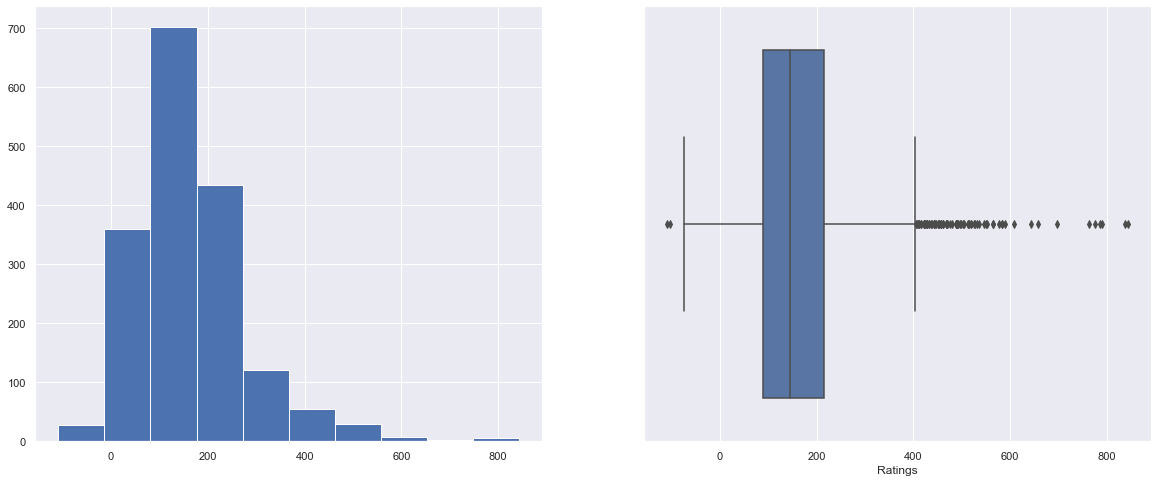

In [801]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df.Ratings.hist()

plt.subplot(1,2,2)
sns.boxplot(df.Ratings)

### 6s hit

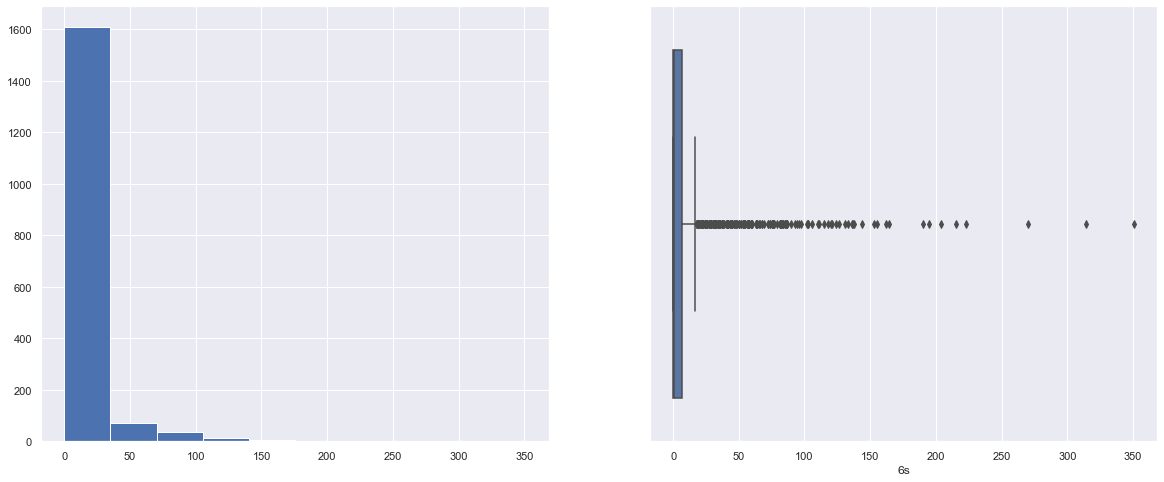

In [802]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df["6s"].hist()

plt.subplot(1,2,2)
sns.boxplot(df["6s"])

### Fifties scored

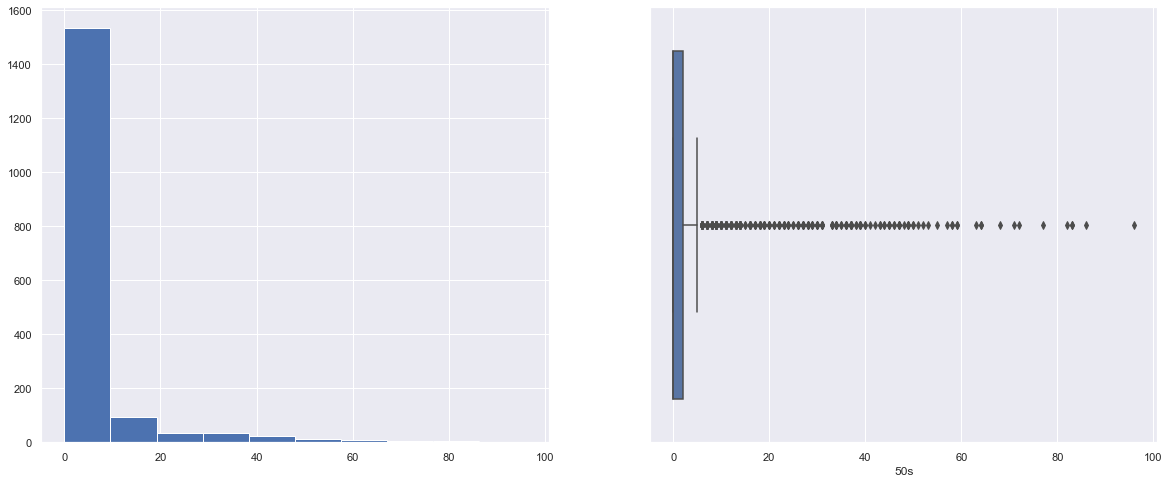

In [803]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df["50s"].hist()

plt.subplot(1,2,2)
sns.boxplot(df["50s"])

### Balls Faced

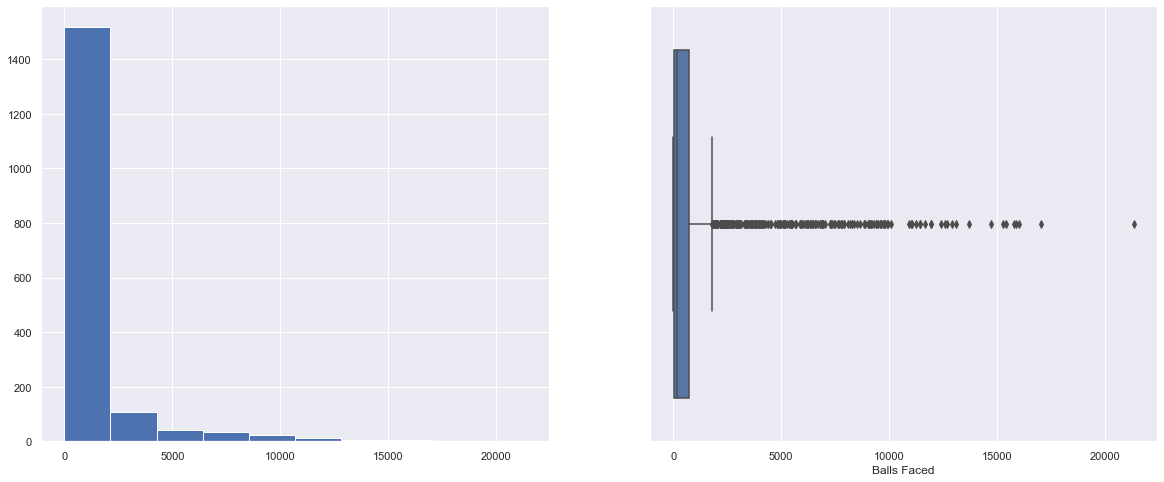

In [804]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df["Balls Faced"].hist()

plt.subplot(1,2,2)
sns.boxplot(df["Balls Faced"])

### Overs Bowled

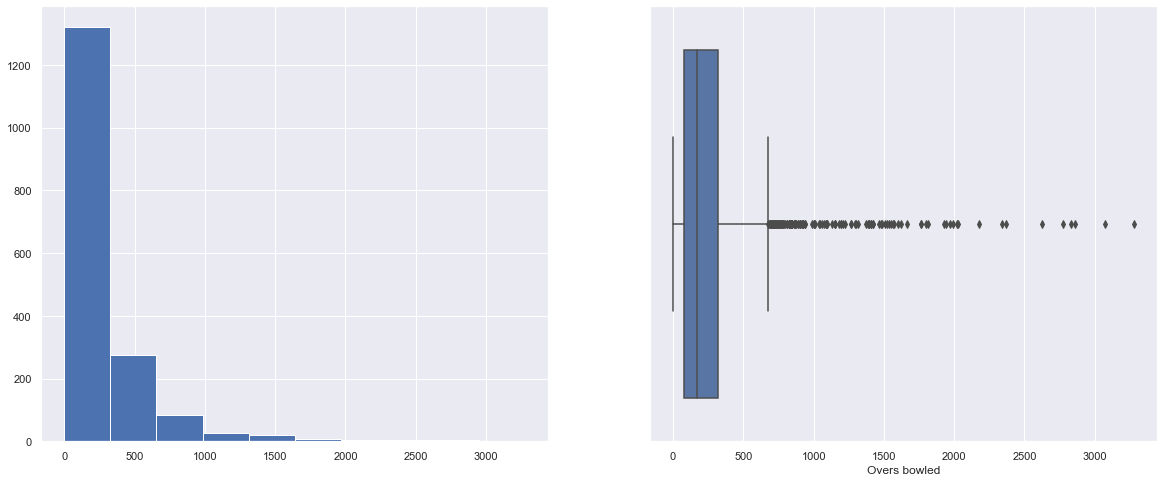

In [805]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df["Overs bowled"].hist()

plt.subplot(1,2,2)
sns.boxplot(df["Overs bowled"])

In [806]:
df.drop(["Name"], axis = 1, inplace = True)

### Balls bowled

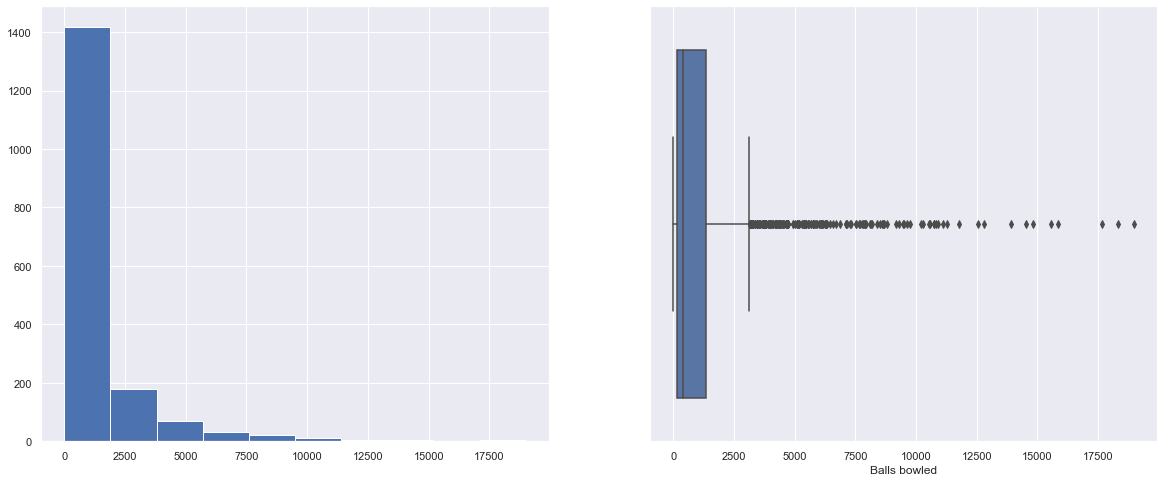

In [807]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df["Balls bowled"].hist()

plt.subplot(1,2,2)
sns.boxplot(df["Balls bowled"])

## Implementations of different machine learning models

### Linear regression

In [808]:
cols = [i for i in df if i != "Ratings"]
X = df[cols]

y = df[["Ratings"]]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=100)

In [809]:
estimation = sm.OLS(y_train, X_train)
est2 = estimation.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:                Ratings   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              2655.
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                        0.00
Time:                        17:57:24   Log-Likelihood:                         -8018.3
No. Observations:                1482   AIC:                                  1.605e+04
Df Residuals:                    1475   BIC:                                  1.609e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [810]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

In [811]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error for test:")
print(round(mean_squared_error(y_test, y_pred),4))

Mean Square Error for test:
2189.3319


In [812]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8421182769696322

## Decision tree

In [971]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.15,random_state=100)

In [972]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train1, y_train1)
y_pred1 = regressor.predict(X_test1)

In [973]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error for test:")
print(round(mean_squared_error(y_test1, y_pred1),4))

Mean Square Error for test:
3024.1183


In [974]:
from sklearn.metrics import r2_score 
r2_score(y_test1, y_pred1)

0.7819183972088658

## KNN - K neareset neighbors

In [975]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,test_size=0.15,random_state=100)


In [976]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train2, y_train2) 
y_pred2 = regressor.predict(X_test2)

In [977]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error for test:")
print(round(mean_squared_error(y_test2, y_pred2),4))

Mean Square Error for test:
3024.1183


In [978]:
from sklearn.metrics import r2_score 
r2_score(y_test2, y_pred2)

0.7819183972088658